In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import sqlite3
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
import libpysal
import esda
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster

In [2]:
#Leitura dos indicadores por região imediata
cnx = sqlite3.connect("indicadores.db")
cur = cnx.cursor()
regimed_df = pd.read_sql_query("SELECT * FROM imedreg_df", cnx)
regimed_df.head()

,imediate_reg,imed_reg_code,epidemiological_week,week_last_day,state,region,city_ibge_code,total_inhabitants,last_available_confirmed,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
0,Abaetetuba,150003,9,2020-02-29,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abaetetuba,150003,10,2020-03-07,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abaetetuba,150003,11,2020-03-14,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abaetetuba,150003,12,2020-03-21,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abaetetuba,150003,13,2020-03-28,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Leitura da geometrias das regiões e merge com os indicadores
ri_geo = geobr.read_immediate_region()
ri_geo = ri_geo.rename(columns={'code_immediate':'imed_reg_code'})
ri_geo['imed_reg_code'] = ri_geo['imed_reg_code'].astype(int)
ri_geo = ri_geo.merge(regimed_df, on = 'imed_reg_code')
ri_geo.head()

,imed_reg_code,name_immediate,code_state,abbrev_state,name_state,code_region,name_region,geometry,imediate_reg,epidemiological_week,...,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
0,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,9,...,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,10,...,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,11,...,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,12,...,0,2,0,0.303159,0.0,0.0,0.303159,0.0,0.0,0.0
4,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,13,...,0,3,0,0.757897,0.0,0.0,0.454738,0.0,1.5,0.0


In [4]:
#Alterar aqui para mudar a semana analisada
sem = ri_geo[ri_geo['epidemiological_week'] == 11]
str_sem = '11'
sem.head()

,imed_reg_code,name_immediate,code_state,abbrev_state,name_state,code_region,name_region,geometry,imediate_reg,epidemiological_week,...,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
2,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,11,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,110002,Ariquemes,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-62.48851 -8.73008, -62.48411 ...",Ariquemes,11,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,110003,Jaru,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-62.22055 -8.59088, -62.21053 ...",Jaru,11,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,110004,Ji-Paraná,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-61.57450 -9.72063, -61.57157 ...",Ji-Paraná,11,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,110005,Cacoal,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-61.42731 -10.98755, -61.00059...",Cacoal,11,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/julia/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 4 islands with ids: 24, 30, 133, 169.
  warnings.warn(message)
/home/julia/anaconda3/lib/python3.7/site-packages/splot/_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values


('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 169, ' is an island (no neighbors)')


/home/julia/anaconda3/lib/python3.7/site-packages/splot/_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


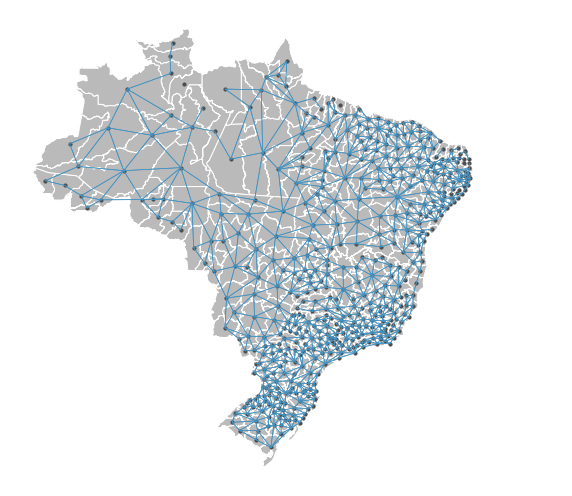

In [5]:
#Cálculo do peso entre regiões
from splot.libpysal import plot_spatial_weights

weights = Queen.from_dataframe(sem)
weights.transform = 'r'
plot_spatial_weights(weights, sem)
plt.show()

/home/julia/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/home/julia/anaconda3/lib/python3.7/site-packages/splot/_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
/home/julia/anaconda3/lib/python3.7/site-packages/splot/_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


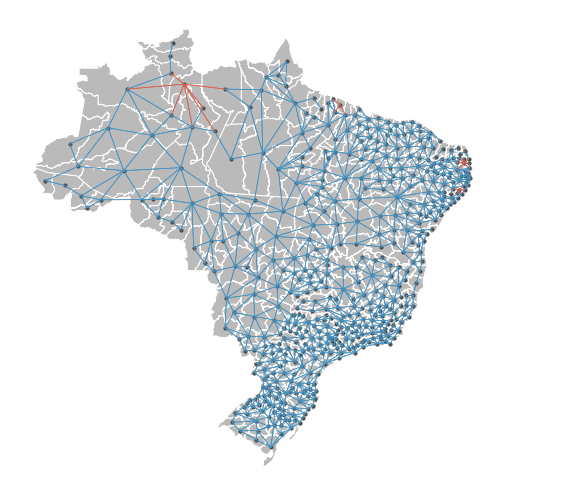

In [6]:
#Consertando os erros causados pela digitalização
wnp = libpysal.weights.util.nonplanar_neighbors(weights, sem)
wnp.transform = 'r'
plot_spatial_weights(wnp, sem)
plt.show()

In [7]:
#Moran Local e Moran I para cada indicador a seguir
spatial_auto = esda.Moran_Local(sem['new_week_cases'], wnp)
moran = esda.Moran(sem['new_week_cases'], wnp)
moran.I

-0.00953142587250851

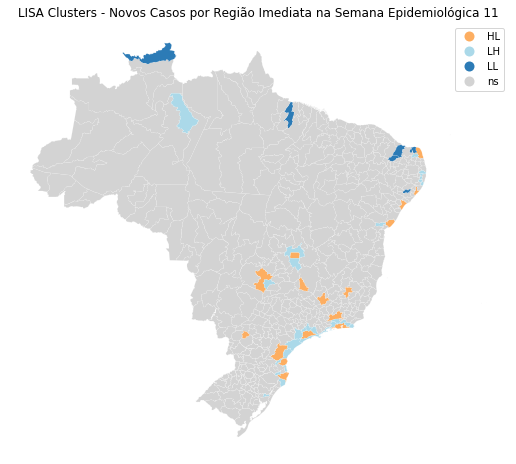

In [8]:
#Plot dos clusters
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))
plt.title('LISA Clusters - Novos Casos por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [9]:
spatial_auto = esda.Moran_Local(sem['new_week_deaths'], wnp)
moran = esda.Moran(sem['new_week_deaths'], wnp)
moran.I

/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1047: RuntimeWarning: invalid value encountered in greater
  zp = self.z > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1048: RuntimeWarning: invalid value encountered in greater
  lp = zl > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1022: RuntimeWarning: invalid value encountered in greater_equal
  above = sim >= self.Is
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/home/julia/anaconda3/lib/python3.7

nan

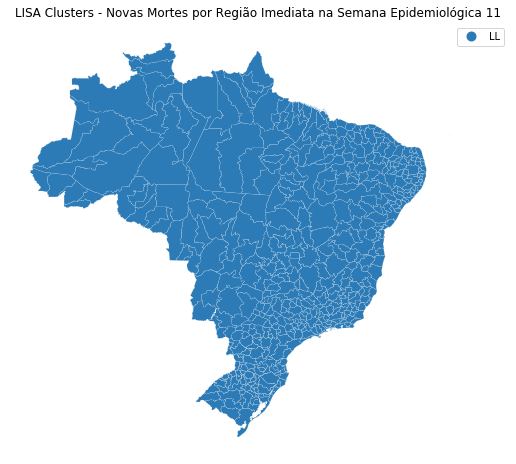

In [10]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Novas Mortes por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [11]:
spatial_auto = esda.Moran_Local(sem['prevalence'], wnp)
moran = esda.Moran(sem['prevalence'], wnp)
moran.I

-0.020306122522509056

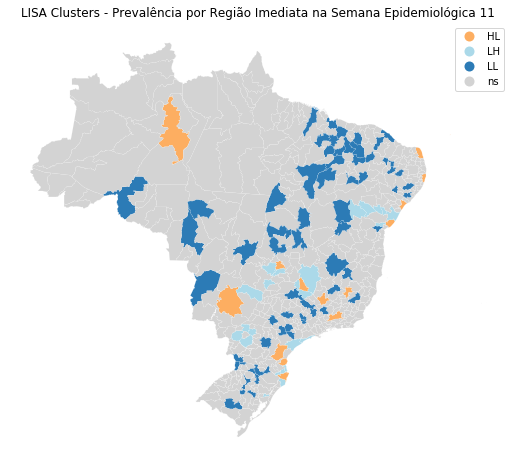

In [12]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Prevalência por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [13]:
spatial_auto = esda.Moran_Local(sem['mortality'], wnp)
moran = esda.Moran(sem['mortality'], wnp)
moran.I

/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1047: RuntimeWarning: invalid value encountered in greater
  zp = self.z > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1048: RuntimeWarning: invalid value encountered in greater
  lp = zl > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1022: RuntimeWarning: invalid value encountered in greater_equal
  above = sim >= self.Is
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/home/julia/anaconda3/lib/python3.7

nan

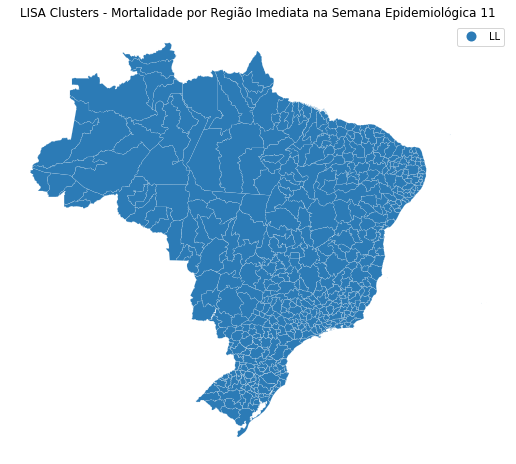

In [14]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Mortalidade por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [15]:
spatial_auto = esda.Moran_Local(sem['lethality'], wnp)
moran = esda.Moran(sem['lethality'], wnp)
moran.I

/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1047: RuntimeWarning: invalid value encountered in greater
  zp = self.z > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1048: RuntimeWarning: invalid value encountered in greater
  lp = zl > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1022: RuntimeWarning: invalid value encountered in greater_equal
  above = sim >= self.Is
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/home/julia/anaconda3/lib/python3.7

nan

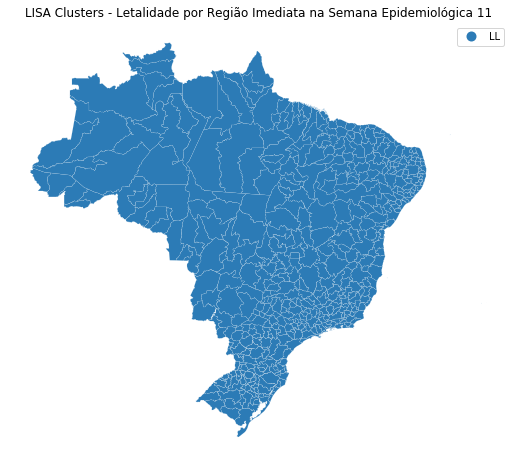

In [16]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Letalidade por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [17]:
spatial_auto = esda.Moran_Local(sem['incidence_cases'], wnp)
moran = esda.Moran(sem['incidence_cases'], wnp)
moran.I

-0.021106559445974702

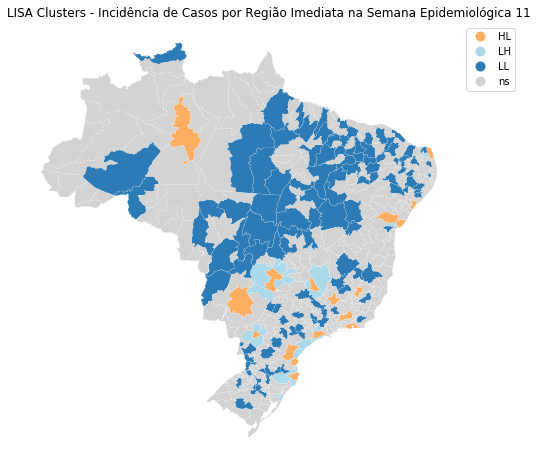

In [18]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Incidência de Casos por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [19]:
spatial_auto = esda.Moran_Local(sem['incidence_deaths'], wnp)
moran = esda.Moran(sem['incidence_deaths'], wnp)
moran.I

/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1047: RuntimeWarning: invalid value encountered in greater
  zp = self.z > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1048: RuntimeWarning: invalid value encountered in greater
  lp = zl > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1022: RuntimeWarning: invalid value encountered in greater_equal
  above = sim >= self.Is
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/home/julia/anaconda3/lib/python3.7

nan

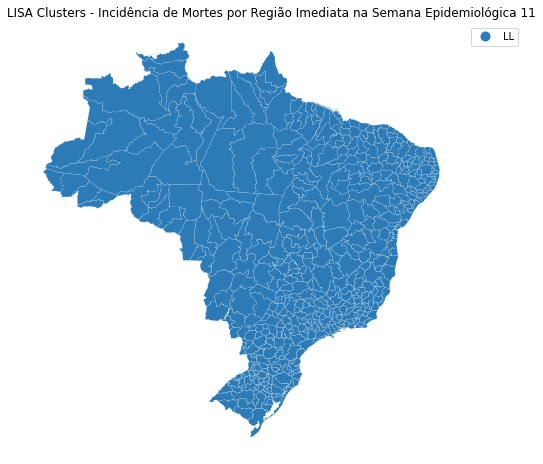

In [20]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Incidência de Mortes por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [21]:
spatial_auto = esda.Moran_Local(sem['cases_growth_factor'], wnp)
moran = esda.Moran(sem['cases_growth_factor'], wnp)
moran.I

-0.00569441478053292

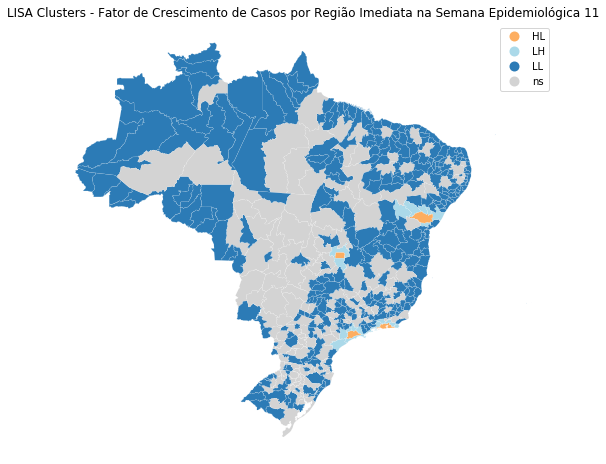

In [22]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Fator de Crescimento de Casos por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [23]:
spatial_auto = esda.Moran_Local(sem['deaths_growth_factor'], wnp)
moran = esda.Moran(sem['deaths_growth_factor'], wnp)
moran.I

/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1047: RuntimeWarning: invalid value encountered in greater
  zp = self.z > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1048: RuntimeWarning: invalid value encountered in greater
  lp = zl > 0
/home/julia/anaconda3/lib/python3.7/site-packages/esda/moran.py:1022: RuntimeWarning: invalid value encountered in greater_equal
  above = sim >= self.Is
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/julia/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/home/julia/anaconda3/lib/python3.7

nan

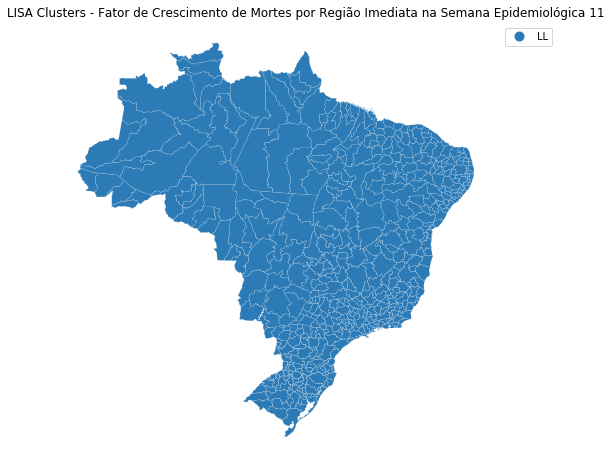

In [24]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Fator de Crescimento de Mortes por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()